In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#per valutazione
from sklearn.metrics import *
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.neighbors import kneighbors_graph

In [ ]:
df = pd.read_csv('words_glasgow.csv')

In [ ]:
df.head()

word  length  arousal  valence  dominance  concreteness  \
0    abattoir       8    4.200    2.864      4.333         5.455   
1       abbey       5    3.125    5.781      4.667         5.906   
2  abbreviate      10    3.273    5.250      5.235         3.286   
3    abdicate       8    4.194    3.767      4.419         3.367   
4  abdication      10    3.846    3.880      4.800         3.292   

   imageability  familiarity    aoa  semsize  gender  polysemy  \
0         4.391        2.382  6.760    4.652   5.391         0   
1         5.344        3.324  5.177    5.121   3.303         0   
2         3.177        5.121  5.543    2.667   3.971         0   
3         2.516        3.971  6.233    4.679   5.167         0   
4         2.571        3.097  6.407    5.083   4.571         0   

   web_corpus_freq  
0         160074.0  
1        4224864.0  
2         140105.0  
3         124123.0  
4         128143.0

In [ ]:
df = df.fillna(0)
df.isna().any()

word               False
length             False
arousal            False
valence            False
dominance          False
concreteness       False
imageability       False
familiarity        False
aoa                False
semsize            False
gender             False
polysemy           False
web_corpus_freq    False
dtype: bool

Cluster con variabili "lenght", "familiarity", "aoa", "gender", "polysemy", "valence"

In [ ]:
###CLUSTER DI VARIABILI LENGTH VALENCE FAMILIARITY AOA GENDER E POLYSEMY
df1 = [df['length'],df['valence'],df['familiarity'], df['aoa'],df['gender'],df['polysemy']]
newdf = pd.DataFrame(df1).transpose()
newdf


length  valence  familiarity    aoa  gender  polysemy
0        8.0    2.864        2.382  6.760   5.391       0.0
1        5.0    5.781        3.324  5.177   3.303       0.0
2       10.0    5.250        5.121  5.543   3.971       0.0
3        8.0    3.767        3.971  6.233   5.167       0.0
4       10.0    3.880        3.097  6.407   4.571       0.0
...      ...      ...          ...    ...     ...       ...
4677     8.0    5.000        3.167  6.036   5.269       0.0
4678     4.0    4.182        6.269  2.636   4.172       0.0
4679     4.0    6.818        4.000  5.364   3.452       0.0
4680     3.0    6.235        5.655  2.324   4.059       0.0
4681     7.0    5.765        4.382  5.824   3.657       0.0

[4682 rows x 6 columns]

In [ ]:
#Standardizziamo le variabili con minmax, per farlo prima creiamo un array
cols= [col for col in newdf.columns[:]]
X = newdf[cols].values
X

array([[ 8.   ,  2.864,  2.382,  6.76 ,  5.391,  0.   ],
       [ 5.   ,  5.781,  3.324,  5.177,  3.303,  0.   ],
       [10.   ,  5.25 ,  5.121,  5.543,  3.971,  0.   ],
       ...,
       [ 4.   ,  6.818,  4.   ,  5.364,  3.452,  0.   ],
       [ 3.   ,  6.235,  5.655,  2.324,  4.059,  0.   ],
       [ 7.   ,  5.765,  4.382,  5.824,  3.657,  0.   ]])

In [ ]:
#ora standardizza
scaler= MinMaxScaler()
X_minmax = scaler.fit_transform(X)
X_minmax = X_minmax
X_minmax

array([[0.42857143, 0.24077721, 0.13888889, 0.96331711, 0.73538771,
        0.        ],
       [0.21428571, 0.62373638, 0.31689342, 0.68810848, 0.38569754,
        0.        ],
       [0.57142857, 0.55402389, 0.65646259, 0.75173853, 0.4975716 ,
        0.        ],
       ...,
       [0.14285714, 0.75987922, 0.44463341, 0.72061892, 0.41065148,
        0.        ],
       [0.07142857, 0.6833399 , 0.75736961, 0.19210709, 0.5123095 ,
        0.        ],
       [0.35714286, 0.62163581, 0.51681784, 0.8005911 , 0.44498409,
        0.        ]])

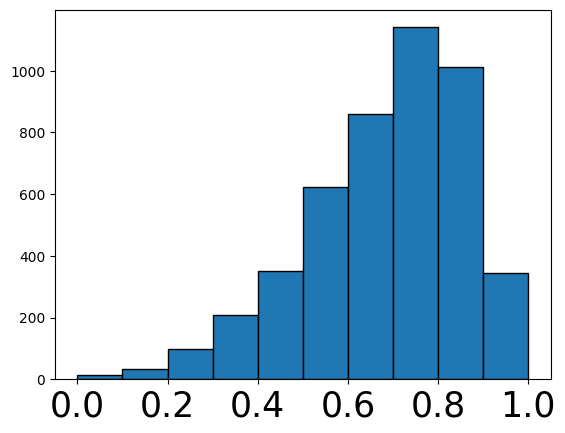

In [ ]:
plt.hist(X_minmax[:,2], edgecolor='black')
plt.xticks(fontsize=25)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, n_init=10, max_iter=100)
kmeans.fit(X_minmax)

KMeans(max_iter=100, n_clusters=4, n_init=10)

In [ ]:
kmeans.labels_

array([0, 0, 0, ..., 0, 2, 0], dtype=int32)

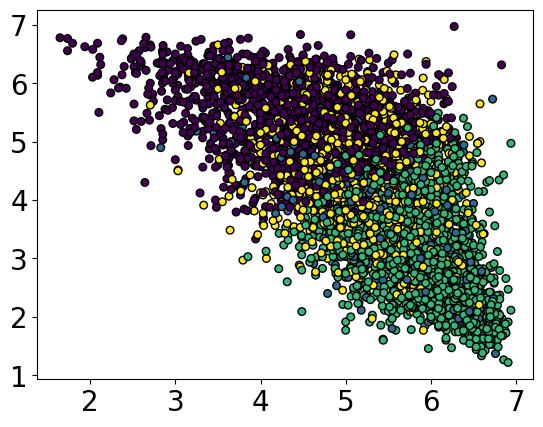

In [ ]:
plt.scatter( df['familiarity'], df['aoa'], s=30, edgecolor='black', c=kmeans.labels_ )
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
#centroid cordinates, normalized not original cordinates
kmeans.cluster_centers_

array([[3.69537083e-01, 5.71986374e-01, 5.30915773e-01, 7.22547407e-01,
        5.26823550e-01, 4.02455846e-16],
       [1.99019977e-01, 5.47170386e-01, 7.46863888e-01, 3.77079809e-01,
        5.31893598e-01, 1.00000000e+00],
       [2.82713740e-01, 6.61489170e-01, 7.98501603e-01, 3.46859405e-01,
        4.63207375e-01, 4.16333634e-16],
       [3.19116632e-01, 2.44381656e-01, 6.74381347e-01, 5.45755310e-01,
        6.02986577e-01, 3.88578059e-16]])

In [ ]:
#x vedere i centroids nel grafico:
centers = kmeans.cluster_centers_
centers

array([[3.69537083e-01, 5.71986374e-01, 5.30915773e-01, 7.22547407e-01,
        5.26823550e-01, 4.02455846e-16],
       [1.99019977e-01, 5.47170386e-01, 7.46863888e-01, 3.77079809e-01,
        5.31893598e-01, 1.00000000e+00],
       [2.82713740e-01, 6.61489170e-01, 7.98501603e-01, 3.46859405e-01,
        4.63207375e-01, 4.16333634e-16],
       [3.19116632e-01, 2.44381656e-01, 6.74381347e-01, 5.45755310e-01,
        6.02986577e-01, 3.88578059e-16]])

Essnedo plot dei valori originali e non standardizzati, i centroidi non sono giusti

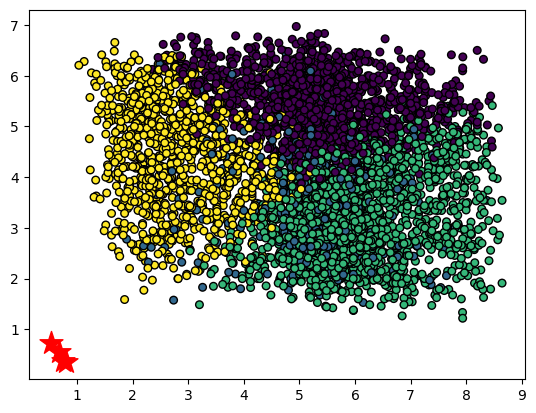

In [ ]:
plt.scatter( newdf['valence'], newdf['aoa'], s=30, edgecolor='black', c=kmeans.labels_ )
plt.scatter( centers[:,2], centers[:,3], s=300, marker='*', c='red')
plt.show()

Per i giusti centroidi:

In [ ]:
centers = scaler.inverse_transform(centers)

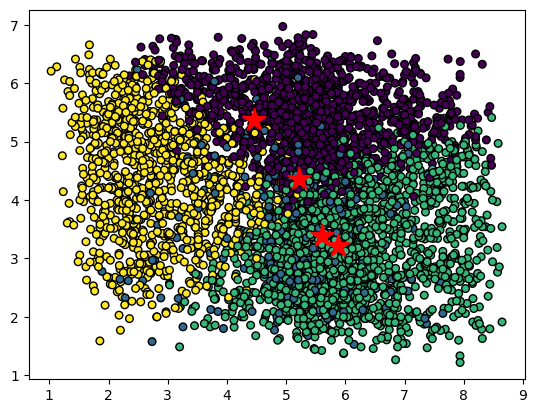

In [ ]:
#ora riutilizza il plot sopra e vedi differenze
plt.scatter( newdf['valence'], newdf['aoa'], s=30, edgecolor='black', c=kmeans.labels_ )
plt.scatter( centers[:,2], centers[:,3], s=300, marker='*', c='red')
plt.show()

Parallele coordinate per verificare la presenza di buoni cluster:

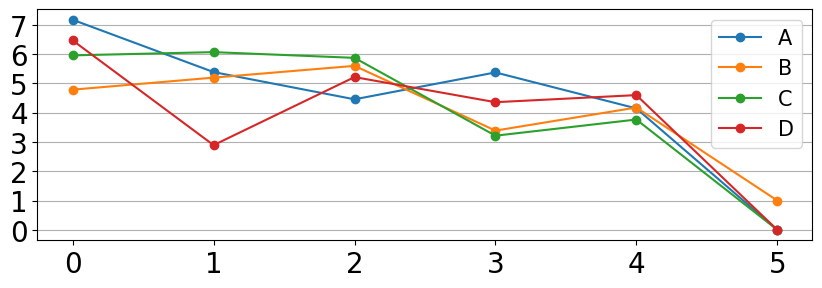

In [ ]:
plt.figure(figsize=(10,3))
clust_name= ['A', 'B', 'C','D']
for i in range(len(centers)):
    plt.plot(centers[i], marker='o', label=clust_name[i])

plt.xticks(range(0,len(cols)), fontsize=20)
plt.yticks(fontsize=20)

plt.legend(fontsize=15, loc='best')
plt.grid(axis='y')
plt.show()


In [ ]:
df['Valenza'] = newdf['valence'].astype(int)
df['Fam'] = newdf['familiarity'].astype(int)
df['Genere'] = newdf['gender'].astype(int)

[]

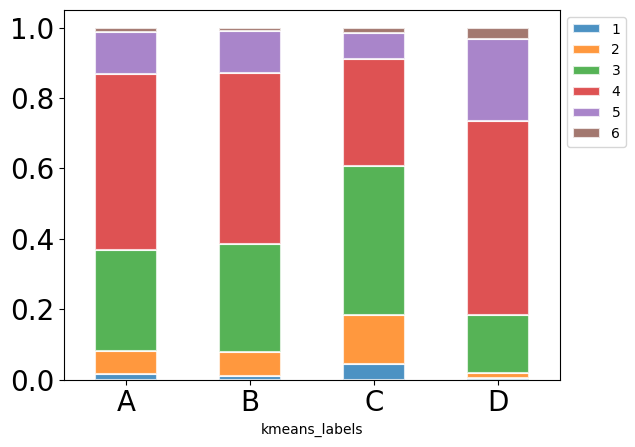

In [ ]:
#crea variabile x cui ogni punto è assegnato ad un cluster
df['kmeans_labels'] = kmeans.labels_

bar_pl = df['Genere'].groupby(df['kmeans_labels']).value_counts(normalize=True).unstack(1)
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='white', linewidth=1.5)

plt.xticks(range(0, len(clust_name)), clust_name, fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(1,1))
plt.plot()


In [ ]:
print('SSE', kmeans.inertia_)
print('Silhouette', silhouette_score(X, kmeans.labels_))

SSE 450.412438086046
Silhouette 0.08950393990131253


In [ ]:
sse_list=[]
for k in range(2,51):
    kmeans=KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X_minmax)
    sse_list.append(kmeans.inertia_)

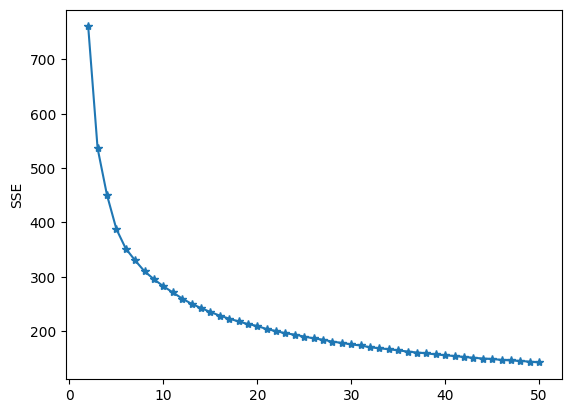

In [ ]:
plt.plot(range(2,len(sse_list)+2), sse_list, marker='*')
plt.ylabel('SSE')
plt.show()

In [ ]:
newdf

length  valence  familiarity    aoa  gender  polysemy
0        8.0    2.864        2.382  6.760   5.391       0.0
1        5.0    5.781        3.324  5.177   3.303       0.0
2       10.0    5.250        5.121  5.543   3.971       0.0
3        8.0    3.767        3.971  6.233   5.167       0.0
4       10.0    3.880        3.097  6.407   4.571       0.0
...      ...      ...          ...    ...     ...       ...
4677     8.0    5.000        3.167  6.036   5.269       0.0
4678     4.0    4.182        6.269  2.636   4.172       0.0
4679     4.0    6.818        4.000  5.364   3.452       0.0
4680     3.0    6.235        5.655  2.324   4.059       0.0
4681     7.0    5.765        4.382  5.824   3.657       0.0

[4682 rows x 6 columns]

Con questo dataset ci sono variabili con outliers ed infatti SSE è molo alto aumentando anche il numero di K. Controlliamo dunque con un dataset di variabili senza outliers:

In [ ]:
df2=[df['aoa'],df['concreteness'],df['imageability'],df['semsize']]
newdf2=pd.DataFrame(df2).transpose()
newdf2

aoa  concreteness  imageability  semsize
0     6.760         5.455         4.391    4.652
1     5.177         5.906         5.344    5.121
2     5.543         3.286         3.177    2.667
3     6.233         3.367         2.516    4.679
4     6.407         3.292         2.571    5.083
...     ...           ...           ...      ...
4677  6.036         6.286         6.185    5.464
4678  2.636         2.688         3.903    1.758
4679  5.364         4.438         4.033    2.636
4680  2.324         6.118         6.441    4.844
4681  5.824         4.429         3.914    4.571

[4682 rows x 4 columns]

In [ ]:
#Standardizziamo le variabili con minmax, per farlo prima creiamo un array
cols= [col for col in newdf2.columns[:]]
X2 = newdf2[cols].values
X2

array([[6.76 , 5.455, 4.391, 4.652],
       [5.177, 5.906, 5.344, 5.121],
       [5.543, 3.286, 3.177, 2.667],
       ...,
       [5.364, 4.438, 4.033, 2.636],
       [2.324, 6.118, 6.441, 4.844],
       [5.824, 4.429, 3.914, 4.571]])

In [ ]:
#ora standardizza
scaler= MinMaxScaler()
X2_minmax = scaler.fit_transform(X2)
X2_minmax = X2_minmax
X2_minmax

array([[0.96331711, 0.72029423, 0.50999231, 0.59183673],
       [0.68810848, 0.80535647, 0.69312068, 0.67653964],
       [0.75173853, 0.31120332, 0.27671022, 0.23333935],
       ...,
       [0.72061892, 0.52847982, 0.44119908, 0.22774065],
       [0.19210709, 0.84534138, 0.90392006, 0.62651255],
       [0.8005911 , 0.52678235, 0.41833205, 0.57720787]])

In [ ]:
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=100)
kmeans.fit(X2_minmax)

KMeans(max_iter=100, n_clusters=3, n_init=10)

In [ ]:
kmeans.labels_

array([0, 0, 1, ..., 0, 2, 1], dtype=int32)

In [ ]:
#centroid cordinates, normalized not original cordinates
kmeans.cluster_centers_
#x vedere i centroids nel grafico:
centers = kmeans.cluster_centers_

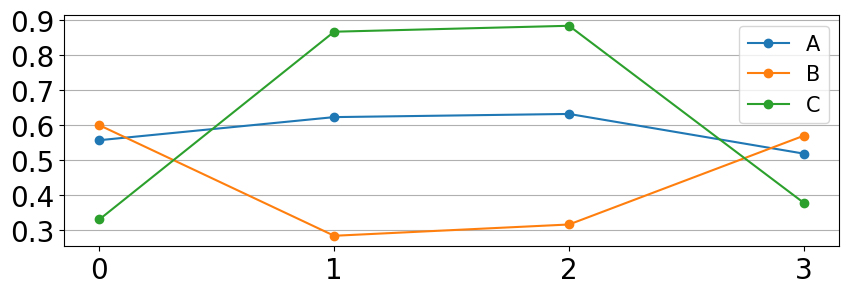

In [ ]:
#coordinate parallels utile x capire se x ogni variabile ci sono dei buoni cluster (ovvero se sono ben separati)
plt.figure(figsize=(10,3))
clust_name= ['A', 'B', 'C']
for i in range(len(centers)):
    plt.plot(centers[i], marker='o', label=clust_name[i])

plt.xticks(range(0,len(cols)), fontsize=20)
plt.yticks(fontsize=20)

plt.legend(fontsize=15, loc='best')
plt.grid(axis='y')
plt.show()


In [ ]:
print('SSE', kmeans.inertia_)
print('Silhouette', silhouette_score(X2_minmax, kmeans.labels_))

SSE 398.7559752848567
Silhouette 0.3104424179188123


In [ ]:
df['age'] = newdf2['aoa'].astype(int)
df['conc'] = newdf2['concreteness'].astype(int)
df['size'] = newdf2['semsize'].astype(int)
df['image'] = newdf2['imageability'].astype(int)

In [ ]:
kmeans.inertia_

398.7559752848567

[]

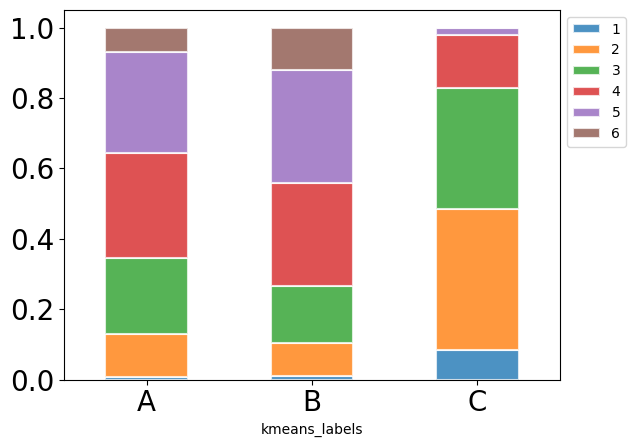

In [ ]:
#crea variabile x cui ogni punto è assegnato ad un cluster
df['kmeans_labels'] = kmeans.labels_

bar_pl = df['age'].groupby(df['kmeans_labels']).value_counts(normalize=True).unstack(1)
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='white', linewidth=1.5)

plt.xticks(range(0, len(clust_name)), clust_name, fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(1,1))
plt.plot()

In [ ]:
sse_list=[]
for k in range(2,51):
    kmeans=KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X2_minmax)
    sse_list.append(kmeans.inertia_)

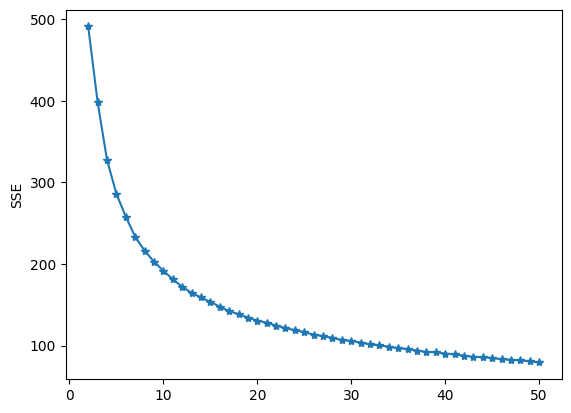

In [ ]:
plt.plot(range(2,len(sse_list)+2), sse_list, marker='*')
plt.ylabel('SSE')
plt.show()

Non avendo buoni risultati, proviamo col seguente set di variabili:

In [ ]:
 df3=[df['aoa'],df['polysemy'],df['semsize']]
newdf3=pd.DataFrame(df3).transpose()
newdf3

aoa  polysemy  semsize
0     6.760       0.0    4.652
1     5.177       0.0    5.121
2     5.543       0.0    2.667
3     6.233       0.0    4.679
4     6.407       0.0    5.083
...     ...       ...      ...
4677  6.036       0.0    5.464
4678  2.636       0.0    1.758
4679  5.364       0.0    2.636
4680  2.324       0.0    4.844
4681  5.824       0.0    4.571

[4682 rows x 3 columns]

In [ ]:
#Standardizziamo le variabili con minmax, per farlo prima creiamo un array
cols= [col for col in newdf3.columns[:]]
X3 = newdf3[cols].values
X3

array([[6.76 , 0.   , 4.652],
       [5.177, 0.   , 5.121],
       [5.543, 0.   , 2.667],
       ...,
       [5.364, 0.   , 2.636],
       [2.324, 0.   , 4.844],
       [5.824, 0.   , 4.571]])

In [ ]:
#ora standardizza
scaler= MinMaxScaler()
X3_minmax = scaler.fit_transform(X3)
X3_minmax = X3_minmax
X3_minmax

array([[0.96331711, 0.        , 0.59183673],
       [0.68810848, 0.        , 0.67653964],
       [0.75173853, 0.        , 0.23333935],
       ...,
       [0.72061892, 0.        , 0.22774065],
       [0.19210709, 0.        , 0.62651255],
       [0.8005911 , 0.        , 0.57720787]])

In [ ]:
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=100)
kmeans.fit(X3_minmax)

KMeans(max_iter=100, n_clusters=3, n_init=10)

In [ ]:
kmeans.labels_

array([0, 0, 0, ..., 0, 1, 0], dtype=int32)

In [ ]:
#centroid cordinates, normalized not original cordinates
kmeans.cluster_centers_
#x vedere i centroids nel grafico:
centers = kmeans.cluster_centers_

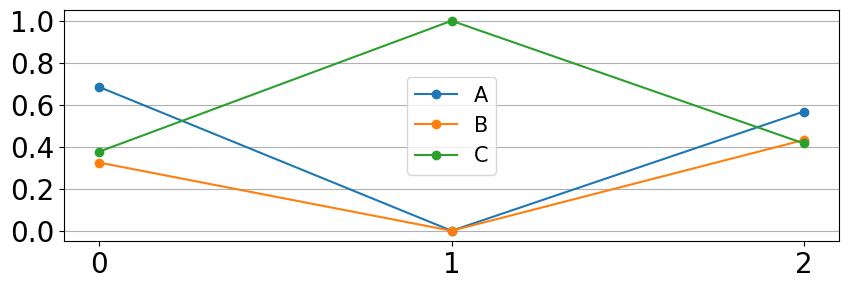

In [ ]:
#coordinate parallels utile x capire se x ogni variabile ci sono dei buoni cluster (ovvero se sono ben separati)
plt.figure(figsize=(10,3))
clust_name= ['A', 'B', 'C']
for i in range(len(centers)):
    plt.plot(centers[i], marker='o', label=clust_name[i])

plt.xticks(range(0,len(cols)), fontsize=20)
plt.yticks(fontsize=20)

plt.legend(fontsize=15, loc='best')
plt.grid(axis='y')
plt.show()


In [ ]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([2340, 1963,  379]))

In [ ]:
print('SSE', kmeans.inertia_)
print('Silhouette', silhouette_score(X3_minmax, kmeans.labels_))

SSE 214.30464201618952
Silhouette 0.4249577999251148


In [ ]:
sse_list=[]
for k in range(2,51):
    kmeans=KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X3_minmax)
    sse_list.append(kmeans.inertia_)

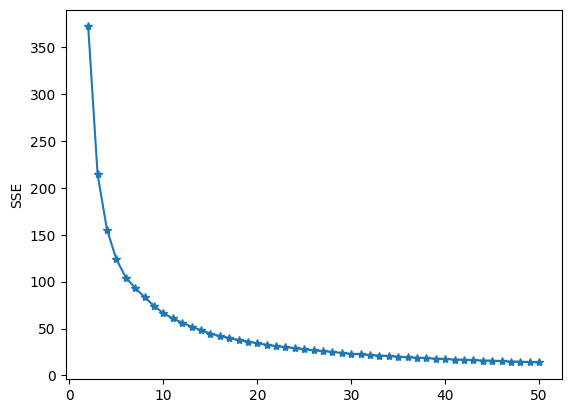

In [ ]:
plt.plot(range(2,len(sse_list)+2), sse_list, marker='*')
plt.ylabel('SSE')
plt.show()

In [ ]:
df4=[df['polysemy'],df['concreteness'],df['valence']]
newdf4=pd.DataFrame(df4).transpose()
newdf4

polysemy  concreteness  valence
0          0.0         5.455    2.864
1          0.0         5.906    5.781
2          0.0         3.286    5.250
3          0.0         3.367    3.767
4          0.0         3.292    3.880
...        ...           ...      ...
4677       0.0         6.286    5.000
4678       0.0         2.688    4.182
4679       0.0         4.438    6.818
4680       0.0         6.118    6.235
4681       0.0         4.429    5.765

[4682 rows x 3 columns]

In [ ]:
#Standardizziamo le variabili con minmax, per farlo prima creiamo un array
cols= [col for col in newdf4.columns[:]]
X4 = newdf4[cols].values
X4

array([[0.   , 5.455, 2.864],
       [0.   , 5.906, 5.781],
       [0.   , 3.286, 5.25 ],
       ...,
       [0.   , 4.438, 6.818],
       [0.   , 6.118, 6.235],
       [0.   , 4.429, 5.765]])

In [ ]:
#ora standardizza
scaler= MinMaxScaler()
X4_minmax = scaler.fit_transform(X4)
X4_minmax = X4_minmax
X4_minmax

array([[0.        , 0.72029423, 0.24077721],
       [0.        , 0.80535647, 0.62373638],
       [0.        , 0.31120332, 0.55402389],
       ...,
       [0.        , 0.52847982, 0.75987922],
       [0.        , 0.84534138, 0.6833399 ],
       [0.        , 0.52678235, 0.62163581]])

In [ ]:
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=100)
kmeans.fit(X4_minmax)

KMeans(max_iter=100, n_clusters=3, n_init=10)

In [ ]:
kmeans.labels_

array([1, 1, 2, ..., 2, 1, 2], dtype=int32)

In [ ]:
#centroid cordinates, normalized not original cordinates
kmeans.cluster_centers_
#x vedere i centroids nel grafico:
centers = kmeans.cluster_centers_

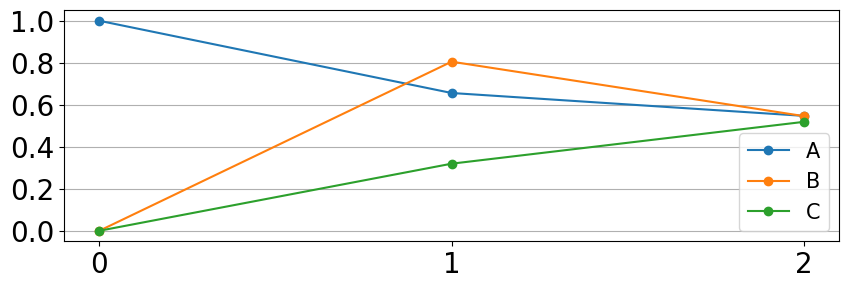

In [ ]:
#coordinate parallels utile x capire se x ogni variabile ci sono dei buoni cluster (ovvero se sono ben separati)
plt.figure(figsize=(10,3))
clust_name= ['A', 'B', 'C']
for i in range(len(centers)):
    plt.plot(centers[i], marker='o', label=clust_name[i])

plt.xticks(range(0,len(cols)), fontsize=20)
plt.yticks(fontsize=20)

plt.legend(fontsize=15, loc='best')
plt.grid(axis='y')
plt.show()

In [ ]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([ 379, 1984, 2319]))

In [ ]:
print('SSE', kmeans.inertia_)
print('Silhouette', silhouette_score(X4_minmax, kmeans.labels_))

SSE 289.7930339200386
Silhouette 0.4673023639383681


In [ ]:
sse_list=[]
for k in range(2,51):
    kmeans=KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X4_minmax)
    sse_list.append(kmeans.inertia_)

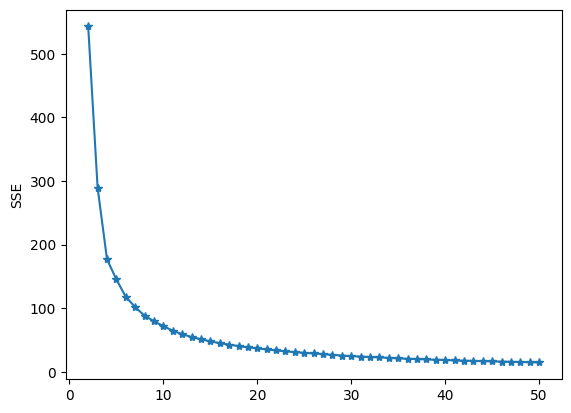

In [ ]:
plt.plot(range(2,len(sse_list)+2), sse_list, marker='*')
plt.ylabel('SSE')
plt.show()

## DBSCAN

In [ ]:
dbscan = DBSCAN( eps=0.3, min_samples=5)
dbscan.fit(X4_minmax)

DBSCAN(eps=0.3)

In [ ]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

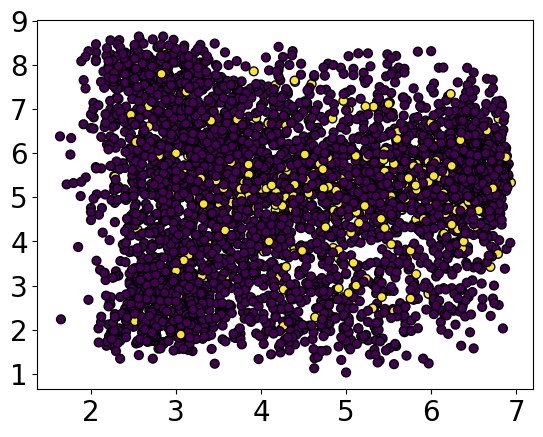

In [ ]:
plt.scatter( X4[:,1], X4[:,2], s=40, edgecolor='black', c= dbscan.labels_ )

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

In [ ]:
dist = pdist(X4_minmax, 'euclidean')
dist = squareform(dist)

k=5
kth_distances = []
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

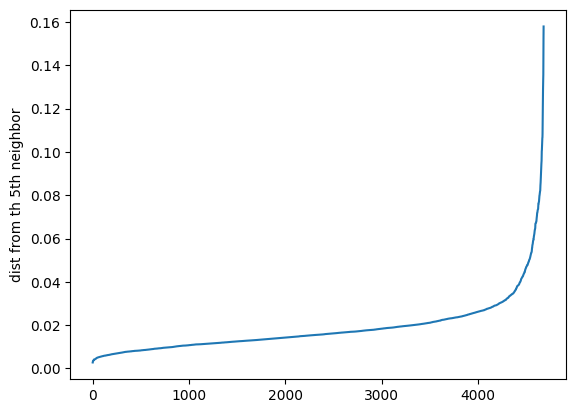

In [ ]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from th 5th neighbor')

plt.show()

# Prove con nuovo Dataframe raggruppando variabili

In [ ]:
df['emotion']= (df['valence']+ df['dominance']) / 2

In [ ]:
df['visual'] = (df['concreteness']+ df['imageability']) / 2

In [ ]:
dfnew= [df['emotion'],df['visual'],df['aoa'],df['gender']]
dfnew

[0       3.5985
 1       5.2240
 2       5.2425
 3       4.0930
 4       4.3400
          ...  
 4677    5.1665
 4678    4.3745
 4679    6.4695
 4680    5.8600
 4681    5.4395
 Name: emotion, Length: 4682, dtype: float64,
 0       4.9230
 1       5.6250
 2       3.2315
 3       2.9415
 4       2.9315
          ...  
 4677    6.2355
 4678    3.2955
 4679    4.2355
 4680    6.2795
 4681    4.1715
 Name: visual, Length: 4682, dtype: float64,
 0       6.760
 1       5.177
 2       5.543
 3       6.233
 4       6.407
         ...  
 4677    6.036
 4678    2.636
 4679    5.364
 4680    2.324
 4681    5.824
 Name: aoa, Length: 4682, dtype: float64,
 0       5.391
 1       3.303
 2       3.971
 3       5.167
 4       4.571
         ...  
 4677    5.269
 4678    4.172
 4679    3.452
 4680    4.059
 4681    3.657
 Name: gender, Length: 4682, dtype: float64]

In [ ]:
dfnew1=pd.DataFrame(dfnew).transpose()
dfnew1

emotion  visual    aoa  gender
0      3.5985  4.9230  6.760   5.391
1      5.2240  5.6250  5.177   3.303
2      5.2425  3.2315  5.543   3.971
3      4.0930  2.9415  6.233   5.167
4      4.3400  2.9315  6.407   4.571
...       ...     ...    ...     ...
4677   5.1665  6.2355  6.036   5.269
4678   4.3745  3.2955  2.636   4.172
4679   6.4695  4.2355  5.364   3.452
4680   5.8600  6.2795  2.324   4.059
4681   5.4395  4.1715  5.824   3.657

[4682 rows x 4 columns]

<Axes: >

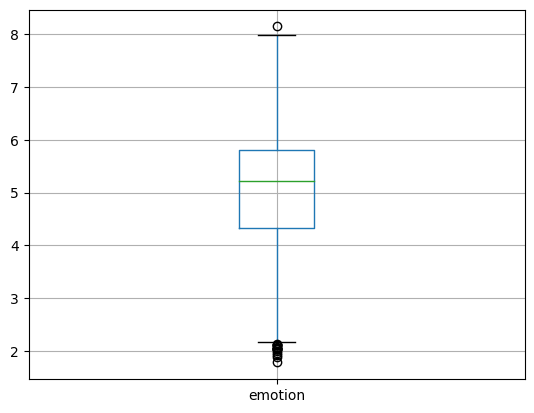

In [ ]:
dfnew1.boxplot(column=['emotion'])

<Axes: >

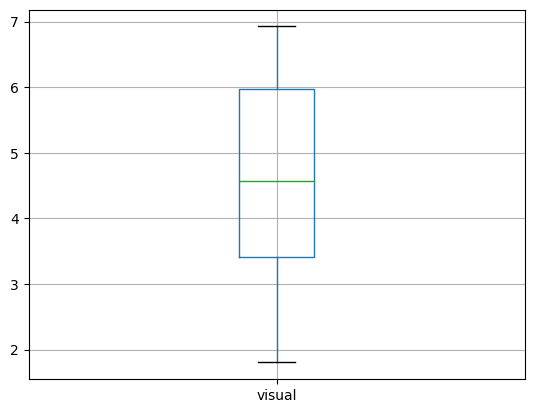

In [ ]:
dfnew1.boxplot(column=['visual'])

<Axes: >

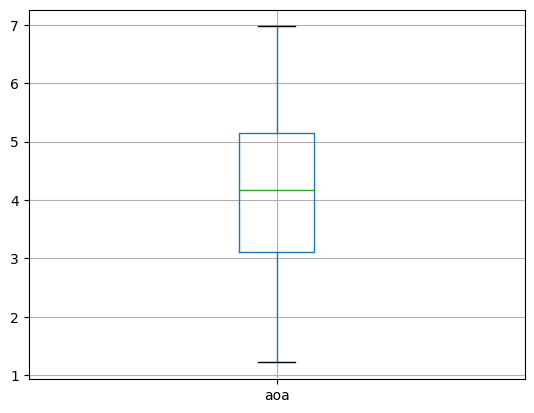

In [ ]:
dfnew1.boxplot(column=['aoa'])

<Axes: >

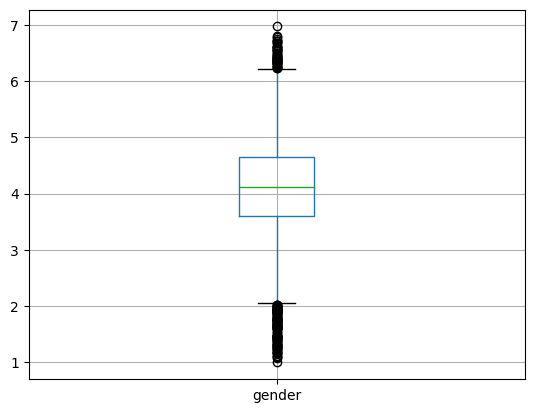

In [ ]:
dfnew1.boxplot(column=['gender'])

# Eliminazione outliers

In [ ]:
def clean(i, x):
    Q1 = x[i].quantile(0.25, interpolation='linear')
    Q3 = x[i].quantile(0.75, interpolation='linear')
    IQR = Q3-Q1
    Lowerfence = Q1 - 1.5*IQR
    Upperfence = Q3 + 1.5*IQR
    NOR= x.loc[(x[i] > Lowerfence) & (x[i] < Upperfence) ]
    return NOR

In [ ]:
dfnew1 = clean('gender', dfnew1)

<Axes: >

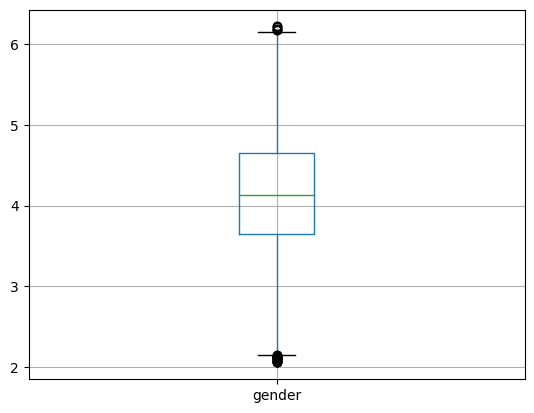

In [ ]:
dfnew1.boxplot(column=['gender'])

In [ ]:
dfnew1 = clean('emotion', dfnew1)

<Axes: >

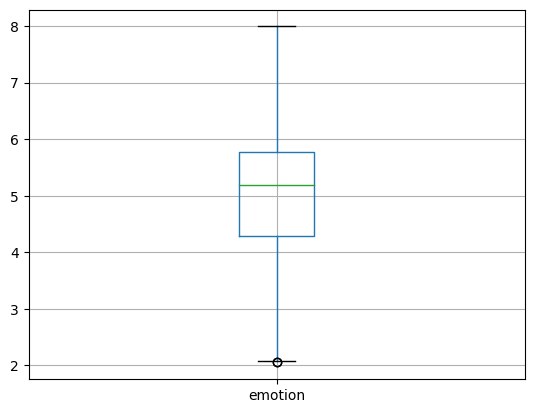

In [ ]:
dfnew1.boxplot(column=['emotion'])

In [ ]:
dfnew1

emotion  visual    aoa  gender
0      3.5985  4.9230  6.760   5.391
1      5.2240  5.6250  5.177   3.303
2      5.2425  3.2315  5.543   3.971
3      4.0930  2.9415  6.233   5.167
4      4.3400  2.9315  6.407   4.571
...       ...     ...    ...     ...
4677   5.1665  6.2355  6.036   5.269
4678   4.3745  3.2955  2.636   4.172
4679   6.4695  4.2355  5.364   3.452
4680   5.8600  6.2795  2.324   4.059
4681   5.4395  4.1715  5.824   3.657

[4507 rows x 4 columns]

In [ ]:
dfnew1.isna().any()

emotion    False
visual     False
aoa        False
gender     False
dtype: bool

In [ ]:
#Standardizziamo le variabili con minmax, per farlo prima creiamo un array
cols= [col for col in dfnew1.columns[:]]
X = dfnew1[cols].values
X

array([[3.5985, 4.923 , 6.76  , 5.391 ],
       [5.224 , 5.625 , 5.177 , 3.303 ],
       [5.2425, 3.2315, 5.543 , 3.971 ],
       ...,
       [6.4695, 4.2355, 5.364 , 3.452 ],
       [5.86  , 6.2795, 2.324 , 4.059 ],
       [5.4395, 4.1715, 5.824 , 3.657 ]])

In [ ]:
#ora standardizza
scaler= MinMaxScaler()
X_minmax = scaler.fit_transform(X)
X_minmax = X_minmax
X_minmax

array([[0.2603351 , 0.6090989 , 0.96232143, 0.80110497],
       [0.53405742, 0.74616811, 0.67964286, 0.2995436 ],
       [0.53717269, 0.27882456, 0.745     , 0.4600048 ],
       ...,
       [0.74379052, 0.47486088, 0.71303571, 0.33533509],
       [0.64115517, 0.87396271, 0.17017857, 0.48114341],
       [0.57034605, 0.46236454, 0.79517857, 0.38457843]])

In [ ]:
kmeans = KMeans(n_clusters=2, n_init=10, max_iter=100, init='k-means++')
kmeans.fit(X_minmax)

KMeans(max_iter=100, n_clusters=2, n_init=10)

In [ ]:
kmeans.labels_

array([0, 1, 0, ..., 0, 1, 0], dtype=int32)

In [ ]:
#centroid cordinates, normalized not original cordinates
kmeans.cluster_centers_
#x vedere i centroids nel grafico:
centers = kmeans.cluster_centers_

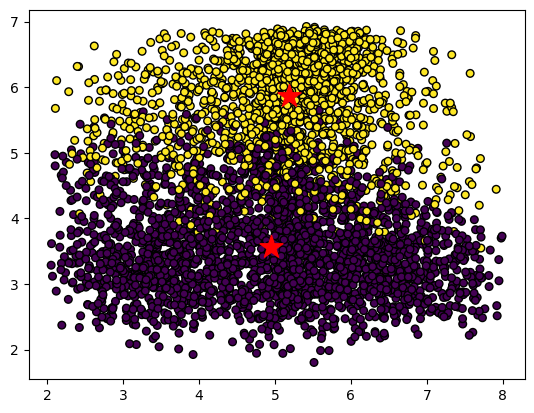

In [ ]:
centers = scaler.inverse_transform(centers)

plt.scatter( dfnew1['emotion'], dfnew1['visual'], s=30, edgecolor='black', c=kmeans.labels_ )
plt.scatter( centers[:,0], centers[:,1], s=300, marker='*', c='red')
plt.show()

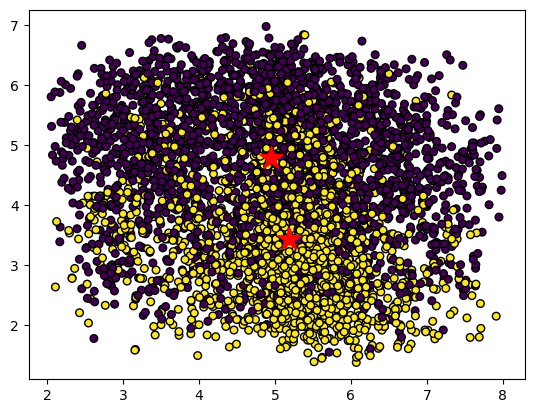

In [ ]:

plt.scatter( dfnew1['emotion'], dfnew1['aoa'], s=30, edgecolor='black', c=kmeans.labels_ )
plt.scatter( centers[:,0], centers[:,2], s=300, marker='*', c='red')
plt.show()

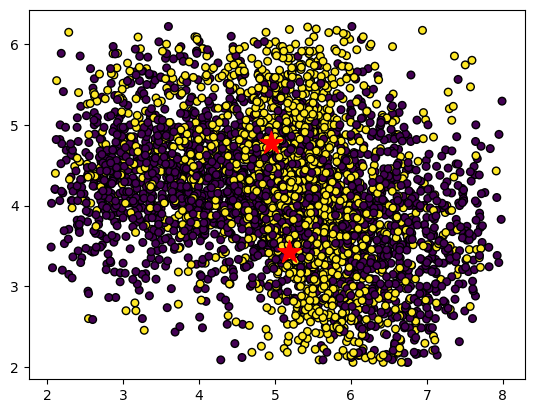

In [ ]:
plt.scatter( dfnew1['emotion'], dfnew1['gender'], s=30, edgecolor='black', c=kmeans.labels_ )
plt.scatter( centers[:,0], centers[:,2], s=300, marker='*', c='red')
plt.show()

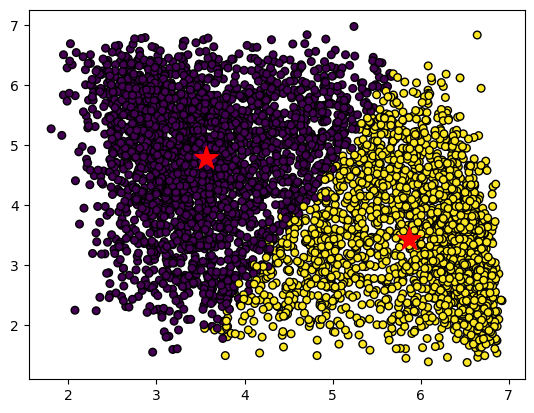

In [ ]:
plt.scatter( dfnew1['visual'], dfnew1['aoa'], s=30, edgecolor='black', c=kmeans.labels_ )
plt.scatter( centers[:,1], centers[:,2], s=300, marker='*', c='red')
plt.show()

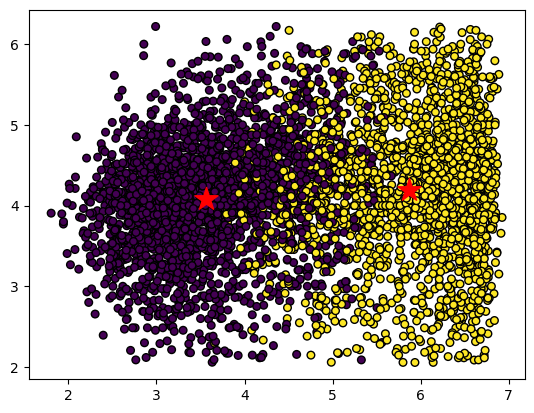

In [ ]:
plt.scatter( dfnew1['visual'], dfnew1['gender'], s=30, edgecolor='black', c=kmeans.labels_ )
plt.scatter( centers[:,1], centers[:,3], s=300, marker='*', c='red')
plt.show()

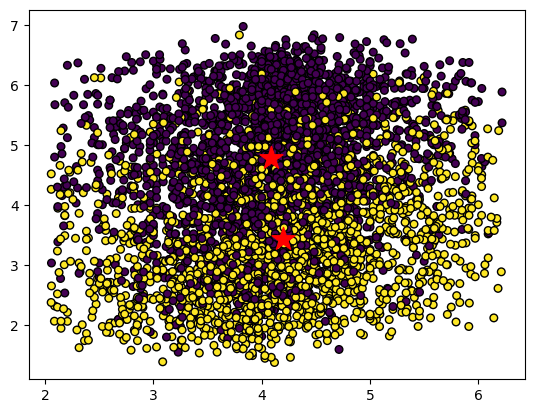

In [ ]:
plt.scatter( dfnew1['gender'], dfnew1['aoa'], s=30, edgecolor='black', c=kmeans.labels_ )
plt.scatter( centers[:,3], centers[:,2], s=300, marker='*', c='red')
plt.show()

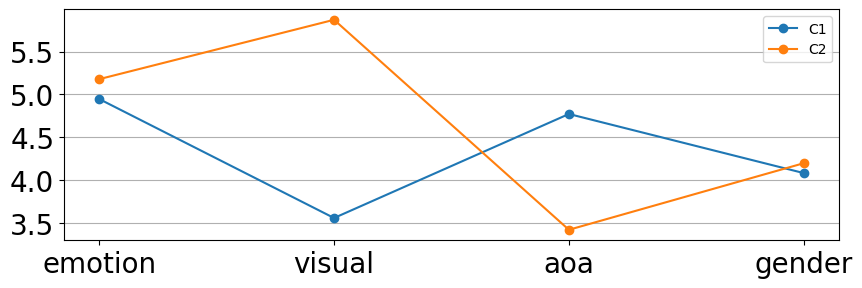

In [ ]:
plt.figure(figsize=(10,3))
clust_name= ['C1', 'C2','C3','C4','C5','C6','C7','C8']
for i in range(len(centers)):
    plt.plot(centers[i], marker='o', label=clust_name[i])

plt.xticks(range(0, 4), list(dfnew1.columns), fontsize=20)
plt.yticks(fontsize=20)

plt.legend(fontsize=10, loc='best')
plt.grid(axis='y')
plt.show()

In [ ]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1], dtype=int32), array([2468, 2039]))

In [ ]:
print('SSE', kmeans.inertia_)
print('Silhouette', silhouette_score(X_minmax, kmeans.labels_))

SSE 590.8906759882364
Silhouette 0.30200526585681775


In [ ]:
sse_list=[]
for k in range(2,31):
    kmeans=KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X_minmax)
    sse_list.append(kmeans.inertia_)

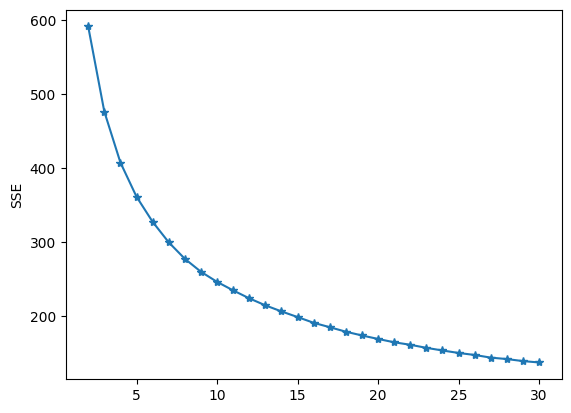

In [ ]:
plt.plot(range(2,len(sse_list)+2), sse_list, marker='*')
plt.ylabel('SSE')
plt.show()

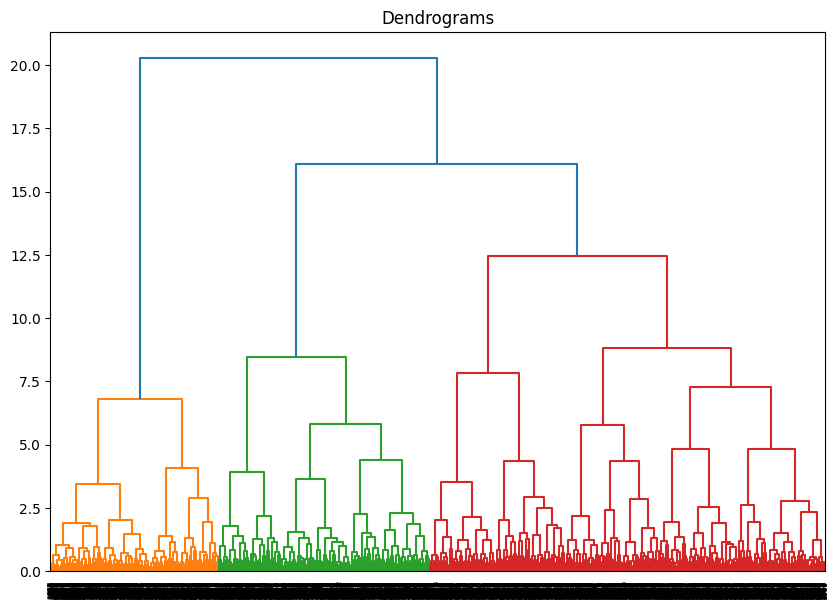

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(X_minmax, method='ward'))

In [ ]:

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
cluster.fit_predict(X_minmax)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([4, 2, 3, ..., 3, 1, 2])

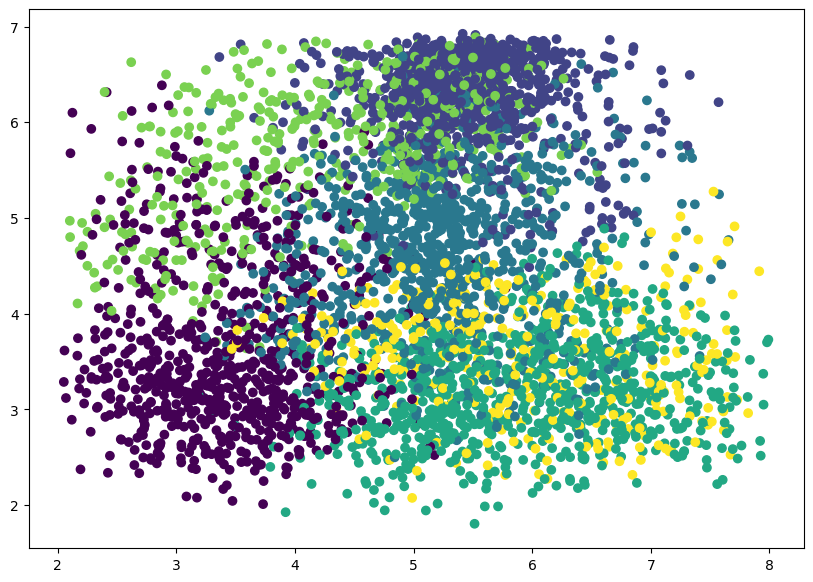

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(dfnew1['emotion'], dfnew1['visual'], c=cluster.labels_)

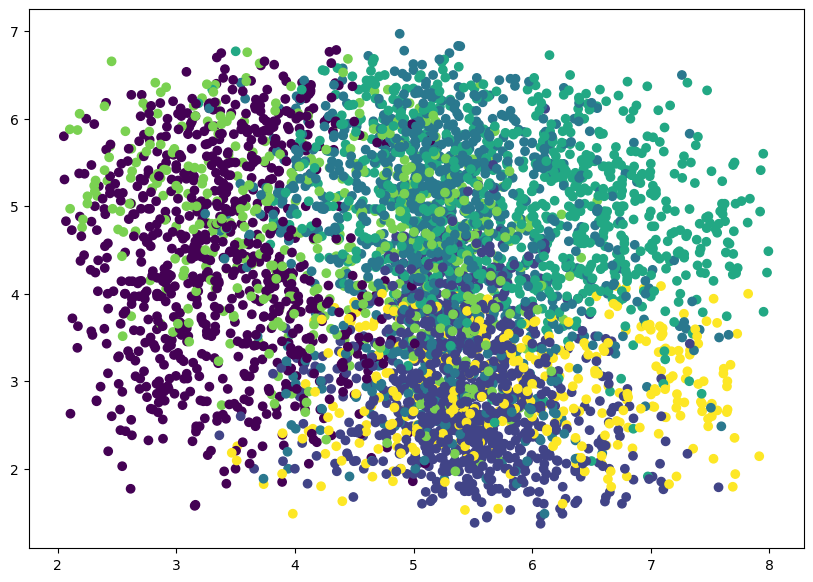

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(dfnew1['emotion'], dfnew1['aoa'], c=cluster.labels_)

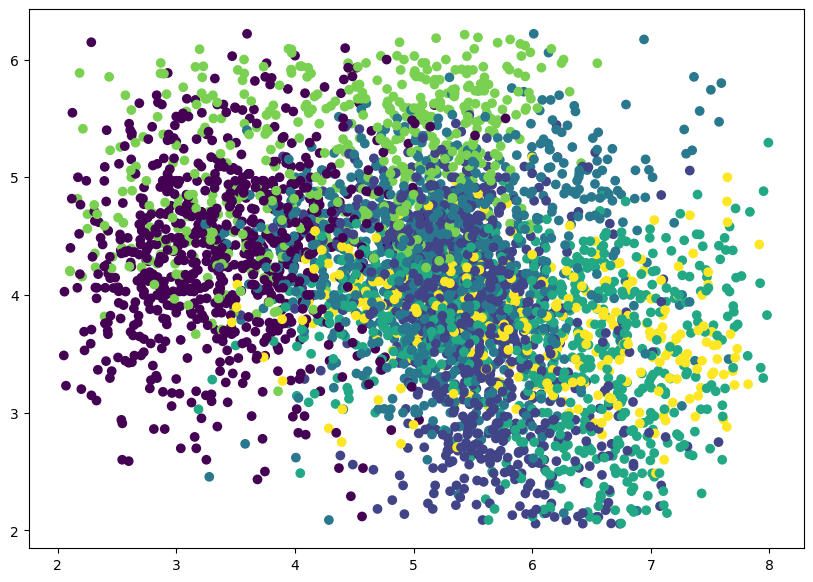

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(dfnew1['emotion'], dfnew1['gender'], c=cluster.labels_)

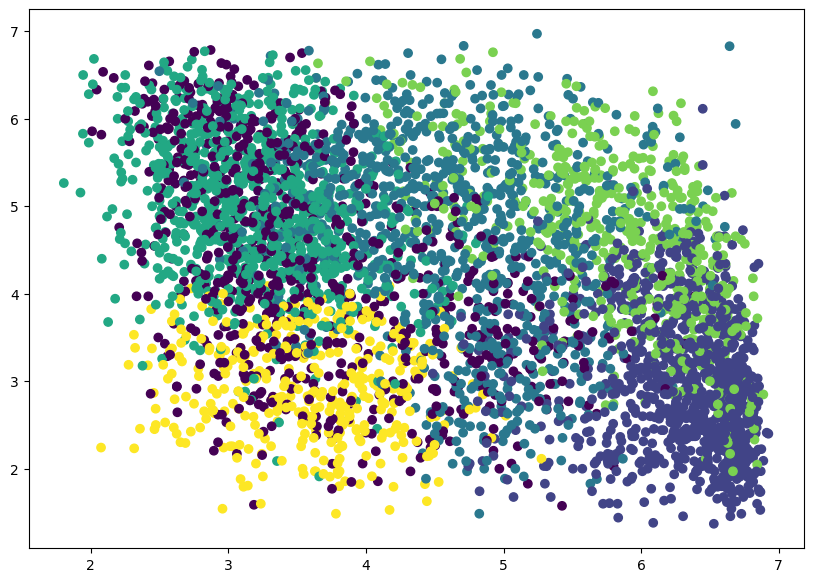

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(dfnew1['visual'], dfnew1['aoa'], c=cluster.labels_)

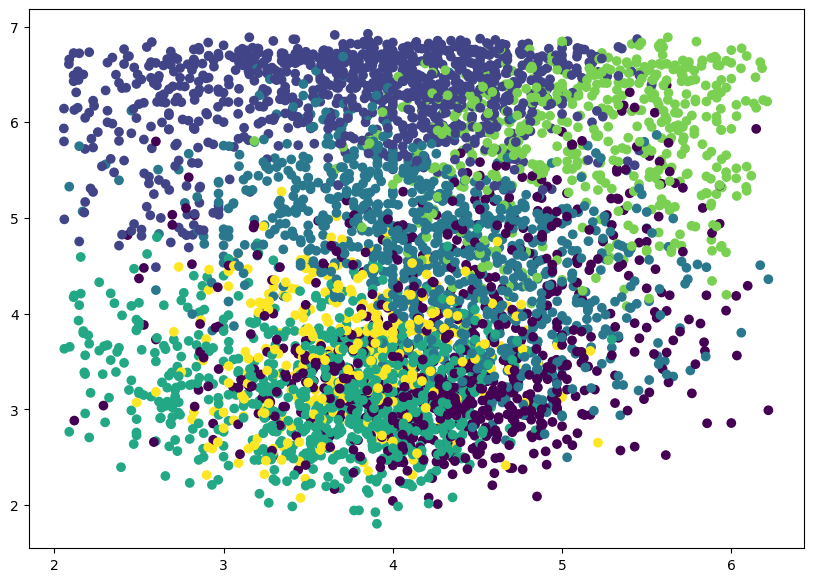

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(dfnew1['gender'], dfnew1['visual'], c=cluster.labels_)

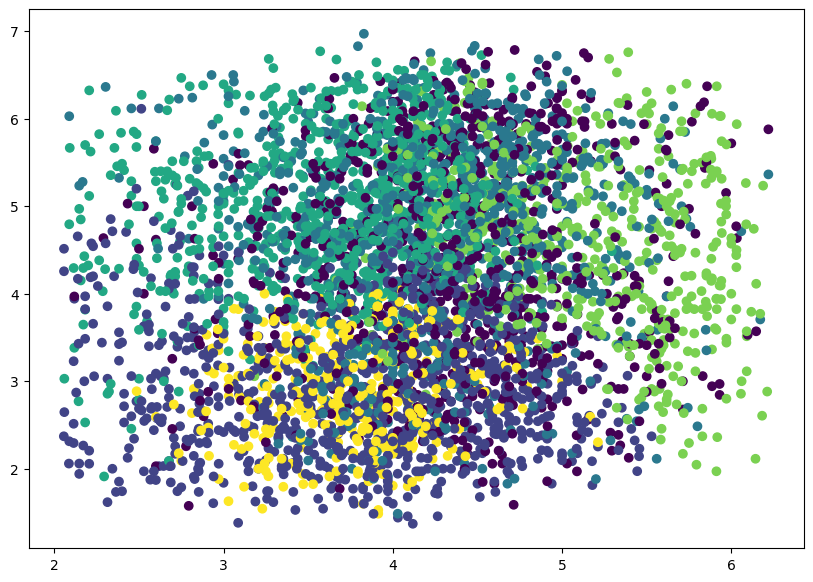

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(dfnew1['gender'], dfnew1['aoa'], c=cluster.labels_)

In [ ]:
connectivity = kneighbors_graph(X_minmax, n_neighbors=100, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

In [ ]:
print( 'ward')
ward = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean',
                                   connectivity=connectivity)
ward.fit(X_minmax)

hist, bins = np.histogram(ward.labels_, bins=range(0, len(set(ward.labels_)) + 1))
print ('labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(X_minmax, ward.labels_))

ward


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


labels {0: 2302, 1: 981, 2: 1224}
silhouette 0.18744847504735082


In [ ]:
print ('average linkage')
average_linkage = AgglomerativeClustering(n_clusters=3, linkage='average', affinity='manhattan',
                                              connectivity=connectivity)
average_linkage.fit(X_minmax)

hist, bins = np.histogram(average_linkage.labels_,
                          bins=range(0, len(set(average_linkage.labels_)) + 1))

print ('labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(X_minmax, average_linkage.labels_))

average linkage


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


labels {0: 9, 1: 5, 2: 4493}
silhouette 0.08104428523852394


In [ ]:
print ('complete linkage')
complete_linkage = AgglomerativeClustering(n_clusters=3, linkage='complete', affinity='l1',
                                              connectivity=connectivity)
complete_linkage.fit(X_minmax)
hist, bins = np.histogram(complete_linkage.labels_,
                          bins=range(0, len(set(complete_linkage.labels_)) + 1))

print ('labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(X_minmax, complete_linkage.labels_))

complete linkage


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


labels {0: 257, 1: 4245, 2: 5}
silhouette 0.0012158978037436698


Togliendo ancora più outliers:

In [ ]:
dfnew1 = clean('gender', dfnew1)

<Axes: >

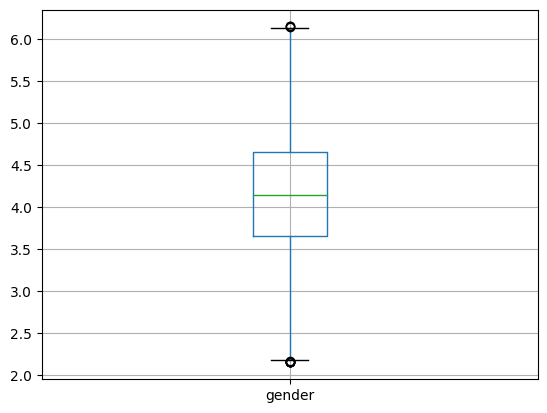

In [ ]:
dfnew1.boxplot(column='gender')

In [ ]:
dfnew1 = clean('emotion', dfnew1)

<Axes: >

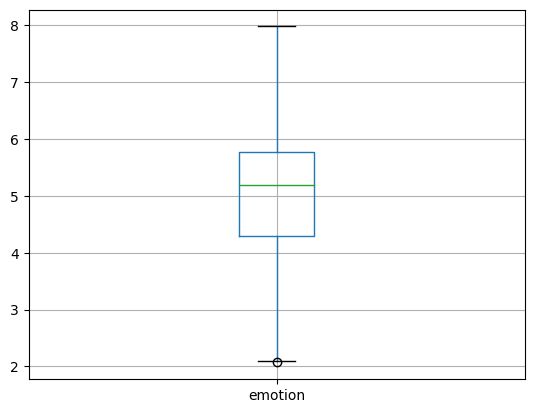

In [ ]:
dfnew1.boxplot(column='emotion')

In [ ]:
dfnew1

emotion  visual    aoa  gender
0      3.5985  4.9230  6.760   5.391
1      5.2240  5.6250  5.177   3.303
2      5.2425  3.2315  5.543   3.971
3      4.0930  2.9415  6.233   5.167
4      4.3400  2.9315  6.407   4.571
...       ...     ...    ...     ...
4677   5.1665  6.2355  6.036   5.269
4678   4.3745  3.2955  2.636   4.172
4679   6.4695  4.2355  5.364   3.452
4680   5.8600  6.2795  2.324   4.059
4681   5.4395  4.1715  5.824   3.657

[4475 rows x 4 columns]

In [ ]:
#Standardizziamo le variabili con minmax, per farlo prima creiamo un array
cols= [col for col in dfnew1.columns[:]]
X = dfnew1[cols].values
X

array([[3.5985, 4.923 , 6.76  , 5.391 ],
       [5.224 , 5.625 , 5.177 , 3.303 ],
       [5.2425, 3.2315, 5.543 , 3.971 ],
       ...,
       [6.4695, 4.2355, 5.364 , 3.452 ],
       [5.86  , 6.2795, 2.324 , 4.059 ],
       [5.4395, 4.1715, 5.824 , 3.657 ]])

In [ ]:
#ora standardizza
scaler= MinMaxScaler()
X_minmax = scaler.fit_transform(X)
X_minmax = X_minmax
X_minmax

array([[0.25858859, 0.6090989 , 0.96232143, 0.811     ],
       [0.53367744, 0.74616811, 0.67964286, 0.289     ],
       [0.53680826, 0.27882456, 0.745     , 0.456     ],
       ...,
       [0.74445761, 0.47486088, 0.71303571, 0.32625   ],
       [0.64130987, 0.87396271, 0.17017857, 0.478     ],
       [0.57014723, 0.46236454, 0.79517857, 0.3775    ]])

In [ ]:
kmeans = KMeans(n_clusters=2, n_init=10, max_iter=100)
kmeans.fit(X_minmax)

KMeans(max_iter=100, n_clusters=2, n_init=10)

In [ ]:
kmeans.labels_

array([1, 0, 1, ..., 1, 0, 1], dtype=int32)

In [ ]:
#centroid cordinates, normalized not original cordinates
kmeans.cluster_centers_
#x vedere i centroids nel grafico:
centers = kmeans.cluster_centers_

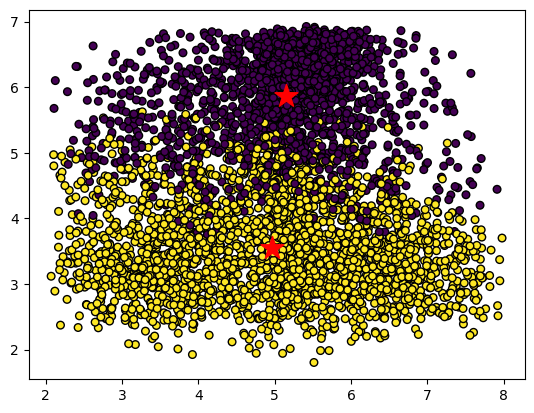

In [ ]:
centers = scaler.inverse_transform(centers)

plt.scatter( dfnew1['emotion'], dfnew1['visual'], s=30, edgecolor='black', c=kmeans.labels_ )
plt.scatter( centers[:,0], centers[:,1], s=300, marker='*', c='red')
plt.show()

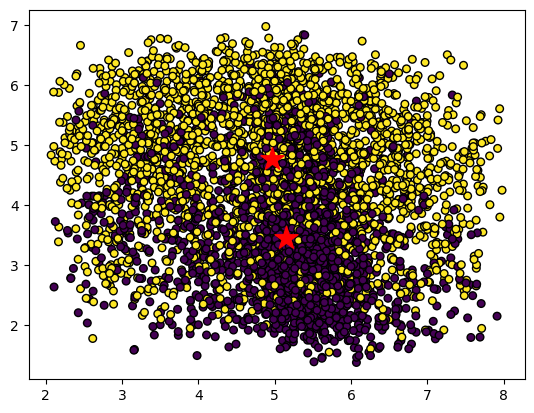

In [ ]:
plt.scatter( dfnew1['emotion'], dfnew1['aoa'], s=30, edgecolor='black', c=kmeans.labels_ )
plt.scatter( centers[:,0], centers[:,2], s=300, marker='*', c='red')
plt.show()

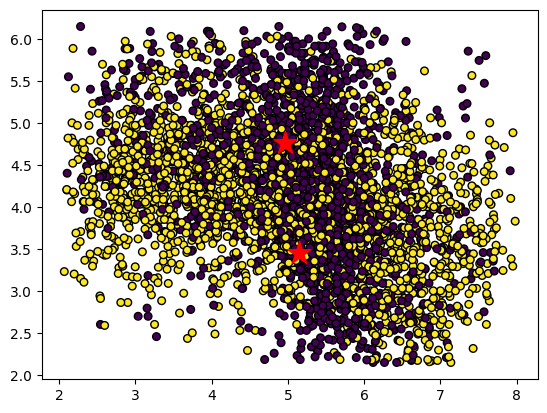

In [ ]:
plt.scatter( dfnew1['emotion'], dfnew1['gender'], s=30, edgecolor='black', c=kmeans.labels_ )
plt.scatter( centers[:,0], centers[:,2], s=300, marker='*', c='red')
plt.show()

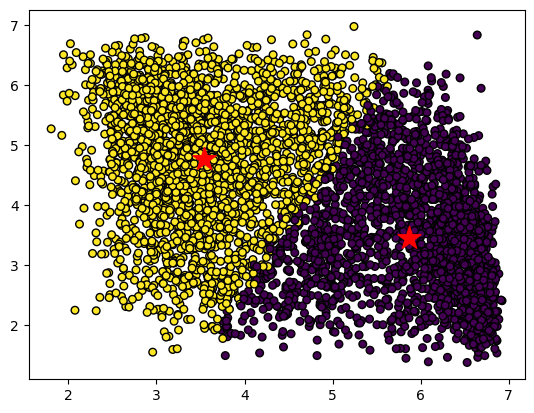

In [ ]:
plt.scatter( dfnew1['visual'], dfnew1['aoa'], s=30, edgecolor='black', c=kmeans.labels_ )
plt.scatter( centers[:,1], centers[:,2], s=300, marker='*', c='red')
plt.show()

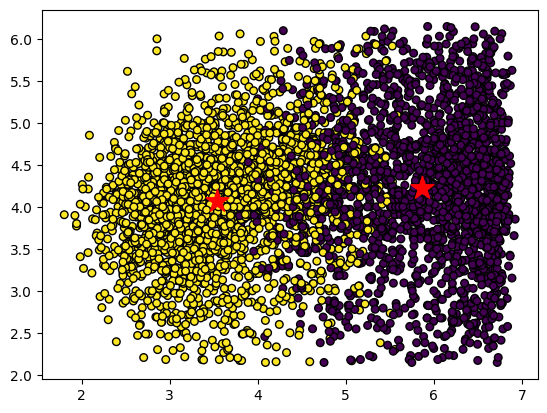

In [ ]:
plt.scatter( dfnew1['visual'], dfnew1['gender'], s=30, edgecolor='black', c=kmeans.labels_ )
plt.scatter( centers[:,1], centers[:,3], s=300, marker='*', c='red')
plt.show()

In [ ]:
print('SSE', kmeans.inertia_)
print('Silhouette', silhouette_score(X_minmax, kmeans.labels_))

SSE 595.40809779912
Silhouette 0.299620419653713


In [ ]:
sse_list=[]
for k in range(2,31):
    kmeans=KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X_minmax)
    sse_list.append(kmeans.inertia_)

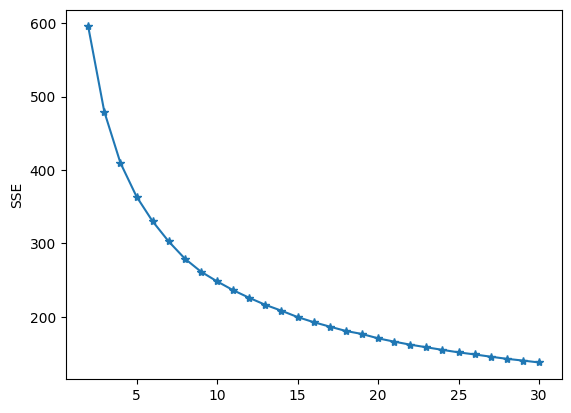

In [ ]:
plt.plot(range(2,len(sse_list)+2), sse_list, marker='*')
plt.ylabel('SSE')
plt.show()

In [ ]:
kmeans = KMeans(init='k-means++', n_clusters=2, n_init=10, max_iter=100)
kmeans.fit(X_minmax)
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
print( 'centers', kmeans.cluster_centers_)
print( 'labels', dict(zip(bins, hist)))
print( 'sse', kmeans.inertia_)
print( 'silhouette', silhouette_score(X_minmax, kmeans.labels_))

centers [[0.52072395 0.79332638 0.37030191 0.51954583]
 [0.48957293 0.33977898 0.60587372 0.48137485]]
labels {0: 2039, 1: 2436}
sse 595.40809779912
silhouette 0.299620419653713


# Trasformo gender in intero

In [ ]:
dfint = [df['emotion'],df['visual'], df['aoa'],df['gender'].astype(int)]
newdfint = pd.DataFrame(dfint).transpose()
newdfint

emotion  visual    aoa  gender
0      3.5985  4.9230  6.760     5.0
1      5.2240  5.6250  5.177     3.0
2      5.2425  3.2315  5.543     3.0
3      4.0930  2.9415  6.233     5.0
4      4.3400  2.9315  6.407     4.0
...       ...     ...    ...     ...
4677   5.1665  6.2355  6.036     5.0
4678   4.3745  3.2955  2.636     4.0
4679   6.4695  4.2355  5.364     3.0
4680   5.8600  6.2795  2.324     4.0
4681   5.4395  4.1715  5.824     3.0

[4682 rows x 4 columns]

<Axes: >

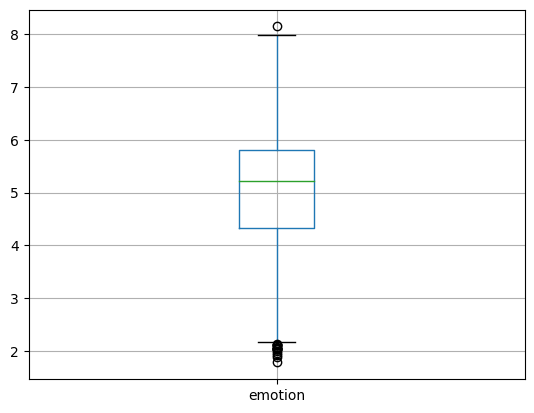

In [ ]:
newdfint.boxplot(column='emotion')

In [ ]:
newdfint = clean('emotion', newdfint)

<Axes: >

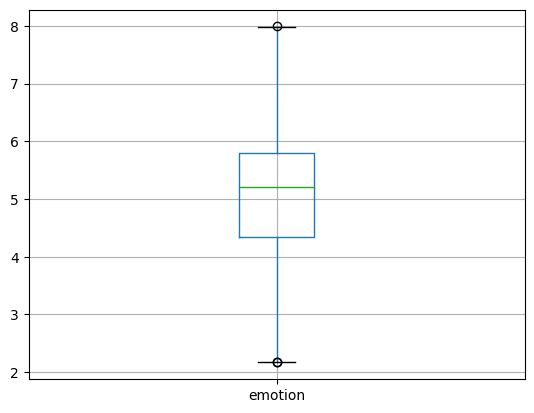

In [ ]:
newdfint.boxplot(column='emotion')

In [ ]:
newdfint = clean('gender', newdfint)

<Axes: >

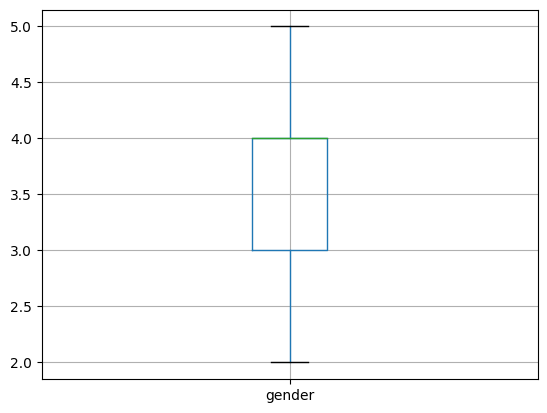

In [ ]:
newdfint.boxplot(column='gender')

In [ ]:
newdfint

emotion  visual    aoa  gender
0      3.5985  4.9230  6.760     5.0
1      5.2240  5.6250  5.177     3.0
2      5.2425  3.2315  5.543     3.0
3      4.0930  2.9415  6.233     5.0
4      4.3400  2.9315  6.407     4.0
...       ...     ...    ...     ...
4677   5.1665  6.2355  6.036     5.0
4678   4.3745  3.2955  2.636     4.0
4679   6.4695  4.2355  5.364     3.0
4680   5.8600  6.2795  2.324     4.0
4681   5.4395  4.1715  5.824     3.0

[4472 rows x 4 columns]

In [ ]:
#Standardizziamo le variabili con minmax, per farlo prima creiamo un array
cols= [col for col in newdfint.columns[:]]
Xint = newdfint[cols].values
Xint

array([[3.5985, 4.923 , 6.76  , 5.    ],
       [5.224 , 5.625 , 5.177 , 3.    ],
       [5.2425, 3.2315, 5.543 , 3.    ],
       ...,
       [6.4695, 4.2355, 5.364 , 3.    ],
       [5.86  , 6.2795, 2.324 , 4.    ],
       [5.4395, 4.1715, 5.824 , 3.    ]])

In [ ]:
#ora standardizza
scaler= MinMaxScaler()
Xint_minmax = scaler.fit_transform(Xint)
Xint_minmax = Xint_minmax
Xint_minmax

array([[0.24585801, 0.6090989 , 0.96232143, 1.        ],
       [0.52493776, 0.74616811, 0.67964286, 0.33333333],
       [0.528114  , 0.27882456, 0.745     , 0.33333333],
       ...,
       [0.73877586, 0.47486088, 0.71303571, 0.33333333],
       [0.63413169, 0.87396271, 0.17017857, 0.66666667],
       [0.56193665, 0.46236454, 0.79517857, 0.33333333]])

In [ ]:
kmeans = KMeans(n_clusters=8, n_init=10, max_iter=100)
kmeans.fit(Xint_minmax)

KMeans(max_iter=100, n_init=10)

In [ ]:
kmeans.labels_

array([5, 6, 2, ..., 2, 1, 2], dtype=int32)

In [ ]:
#centroid cordinates, normalized not original cordinates
kmeans.cluster_centers_
#x vedere i centroids nel grafico:
centers = kmeans.cluster_centers_

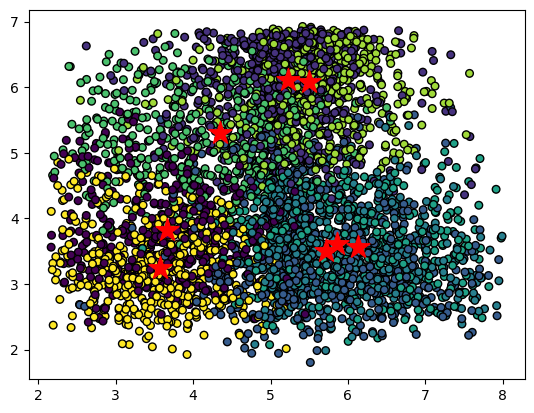

In [ ]:
centers = scaler.inverse_transform(centers)

plt.scatter( newdfint['emotion'], newdfint['visual'], s=30, edgecolor='black', c=kmeans.labels_ )
plt.scatter( centers[:,0], centers[:,1], s=300, marker='*', c='red')
plt.show()

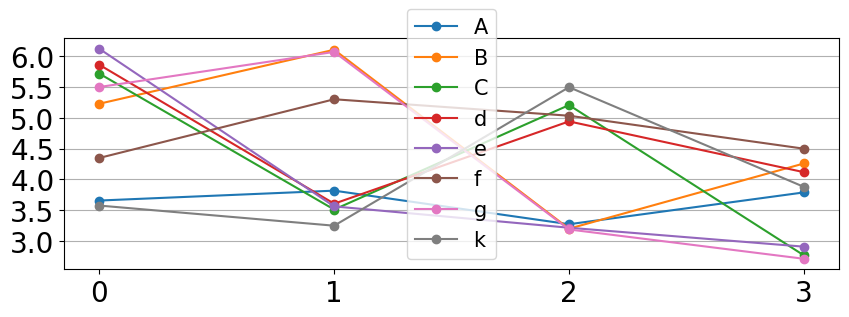

In [ ]:
#coordinate parallels utile x capire se x ogni variabile ci sono dei buoni cluster (ovvero se sono ben separati)
plt.figure(figsize=(10,3))
clust_name= ['A', 'B', 'C','d','e','f','g','k']
for i in range(len(centers)):
    plt.plot(centers[i], marker='o', label=clust_name[i])

plt.xticks(range(0,len(cols)), fontsize=20)
plt.yticks(fontsize=20)

plt.legend(fontsize=15, loc='best')
plt.grid(axis='y')
plt.show()

In [ ]:
print('SSE', kmeans.inertia_)
print('Silhouette', silhouette_score(Xint_minmax, kmeans.labels_))

SSE 333.2804293294007
Silhouette 0.24943942721951726


In [ ]:
sse_list=[]
for k in range(2,31):
    kmeans=KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(Xint_minmax)
    sse_list.append(kmeans.inertia_)

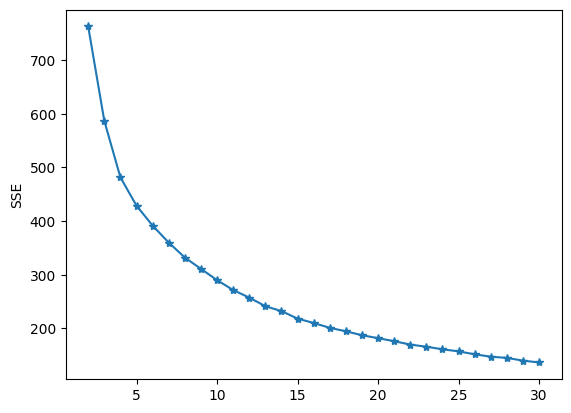

In [ ]:
plt.plot(range(2,len(sse_list)+2), sse_list, marker='*')
plt.ylabel('SSE')
plt.show()

# Provo anche Aoa come intero

In [ ]:
dfint2 = [df['emotion'],df['visual'], df['aoa'].astype(int),df['gender'].astype(int)]
newdfint2 = pd.DataFrame(dfint2).transpose()
newdfint2

emotion  visual  aoa  gender
0      3.5985  4.9230  6.0     5.0
1      5.2240  5.6250  5.0     3.0
2      5.2425  3.2315  5.0     3.0
3      4.0930  2.9415  6.0     5.0
4      4.3400  2.9315  6.0     4.0
...       ...     ...  ...     ...
4677   5.1665  6.2355  6.0     5.0
4678   4.3745  3.2955  2.0     4.0
4679   6.4695  4.2355  5.0     3.0
4680   5.8600  6.2795  2.0     4.0
4681   5.4395  4.1715  5.0     3.0

[4682 rows x 4 columns]

In [ ]:
newdfint2 = clean('emotion', newdfint2)

<Axes: >

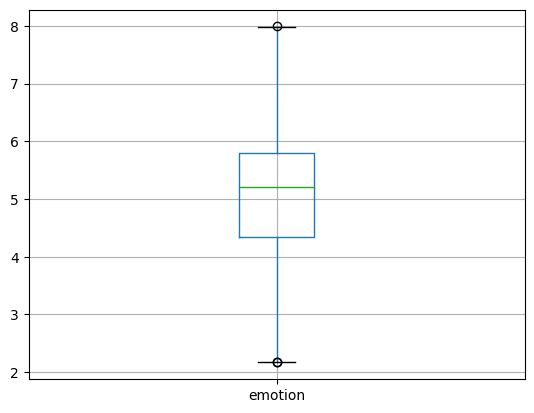

In [ ]:
newdfint2.boxplot(column='emotion')

In [ ]:
newdfint2 = clean('gender', newdfint2)

In [ ]:
#Standardizziamo le variabili con minmax, per farlo prima creiamo un array
cols= [col for col in newdfint2.columns[:]]
Xint2 = newdfint2[cols].values
Xint2

array([[3.5985, 4.923 , 6.    , 5.    ],
       [5.224 , 5.625 , 5.    , 3.    ],
       [5.2425, 3.2315, 5.    , 3.    ],
       ...,
       [6.4695, 4.2355, 5.    , 3.    ],
       [5.86  , 6.2795, 2.    , 4.    ],
       [5.4395, 4.1715, 5.    , 3.    ]])

In [ ]:
#ora standardizza
scaler= MinMaxScaler()
Xint2_minmax = scaler.fit_transform(Xint2)
Xint2_minmax = Xint2_minmax
Xint2_minmax

array([[0.24585801, 0.6090989 , 1.        , 1.        ],
       [0.52493776, 0.74616811, 0.8       , 0.33333333],
       [0.528114  , 0.27882456, 0.8       , 0.33333333],
       ...,
       [0.73877586, 0.47486088, 0.8       , 0.33333333],
       [0.63413169, 0.87396271, 0.2       , 0.66666667],
       [0.56193665, 0.46236454, 0.8       , 0.33333333]])

In [ ]:
kmeans = KMeans(n_clusters=9, n_init=10, max_iter=100)
kmeans.fit(Xint2_minmax)

KMeans(max_iter=100, n_clusters=9, n_init=10)

In [ ]:
kmeans.labels_

array([6, 0, 5, ..., 5, 4, 5], dtype=int32)

In [ ]:
#centroid cordinates, normalized not original cordinates
kmeans.cluster_centers_
#x vedere i centroids nel grafico:
centers = kmeans.cluster_centers_

In [ ]:
print('SSE', kmeans.inertia_)
print('Silhouette', silhouette_score(Xint2_minmax, kmeans.labels_))

SSE 331.7159190468393
Silhouette 0.2612662689831728


In [ ]:
sse_list=[]
for k in range(2,31):
    kmeans=KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(Xint2_minmax)
    sse_list.append(kmeans.inertia_)

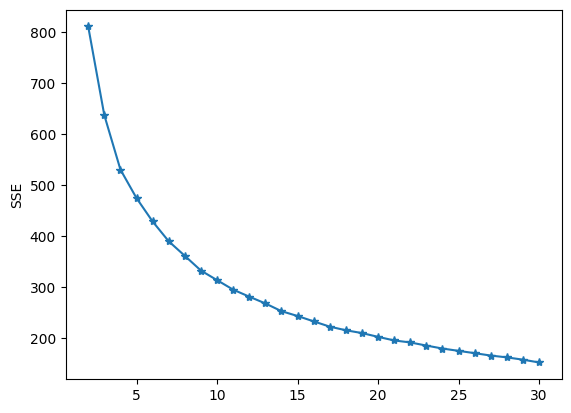

In [ ]:
plt.plot(range(2,len(sse_list)+2), sse_list, marker='*')
plt.ylabel('SSE')
plt.show()